In [43]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

In [54]:
df = pd.read_csv("01-cstimer-3x3.csv", delimiter=";")
df["Date"] = pd.to_datetime(df["Date"])
df["Hour"] = df["Date"].dt.hour

def parse_time(time):
    pattern = r"(?:(\d)+:)?(\d+)\.(\d+)"
    match = re.match(pattern, time)
    if match:
        mins = int(match.group(1)) if match.group(1) else 0
        seconds = int(match.group(2))
        hundredths = int(match.group(3))
        milliseconds = hundredths * 10 + seconds * 1000 + mins * 60000
        return pd.Timedelta(milliseconds, "ms")
    else:
        return np.nan


df["Time"] = df["Time"].apply(parse_time)
df = df.dropna(subset=["Time"])
df["Seconds"] = df["Time"].dt.total_seconds()

df

,No.,Time,Comment,Scramble,Date,P.1,Hour,Seconds
0,1,0 days 00:00:42.410000,NaN,F' U2 F' L2 B F2 U2 R2 F2 L2 R B D2 R' U F2 D2...,2021-10-06 10:56:13,42.41,10,42.41
1,2,0 days 00:00:46.580000,NaN,L2 B2 R2 D2 U' B2 F2 U' F2 R2 D2 B' L U L2 B F...,2021-10-06 11:04:03,46.58,11,46.58
2,3,0 days 00:01:02.120000,NaN,L2 U B2 U F2 L2 F2 D L2 B2 D U2 R' U L R' B' R...,2021-10-06 12:36:48,1:02.12,12,62.12
3,4,0 days 00:00:37.060000,NaN,R' F R' U2 L2 B2 R' B2 L' U2 L U L B D' B2 R' ...,2021-10-06 13:44:15,37.06,13,37.06
4,5,0 days 00:00:47.910000,NaN,L' U2 D2 B' L U B R' B' R2 U2 F2 L2 F2 U' B2 U F2,2021-10-06 13:45:31,47.91,13,47.91
...,...,...,...,...,...,...,...,...
269,270,0 days 00:00:27.450000,NaN,R D2 B D2 L2 B R2 F' D2 L2 U2 F R2 L' D B U L2...,2023-02-07 17:57:25,27.45,17,27.45
270,271,0 days 00:00:33.020000,NaN,D L2 B2 R2 F2 U2 B' R2 F' D2 L2 B' U F' D' F L...,2023-02-07 17:58:14,33.02,17,33.02
271,272,0 days 00:00:30.970000,NaN,D2 B2 U2 L2 B D2 R2 B D2 U2 F2 R' U' F' R2 B U...,2023-02-07 17:59:04,30.97,17,30.97
272,273,0 days 00:00:30.770000,NaN,R2 B2 D2 L2 D' B2 D2 R2 B2 L2 D' B D' U' F L U...,2023-06-02 18:01:25,30.77,18,30.77


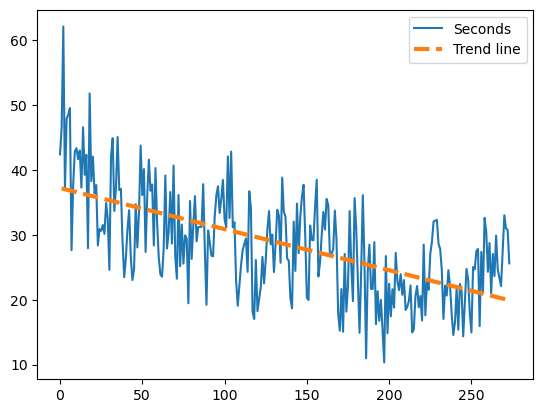

In [55]:
ax = df["Seconds"].plot()
trend_line = np.polyval(np.polyfit(df["No."], df["Seconds"], 1), df["No."])
ax.plot(df["No."], trend_line, linestyle="--", label="Trend line", linewidth=3)
ax.legend()

Text(0.5, 1.0, 'Solves by weekday')

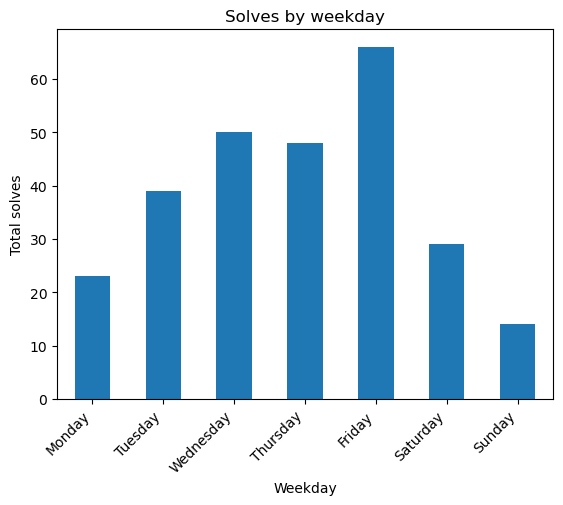

In [56]:
ax = df["Date"].dt.weekday.value_counts().sort_index().plot(kind="bar")
ax.set_xticklabels(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    rotation=45,
    ha="right",
)
ax.set_xlabel("Weekday")
ax.set_ylabel("Total solves")
ax.set_title("Solves by weekday")

Text(0.5, 1.0, 'Solves by time of day')

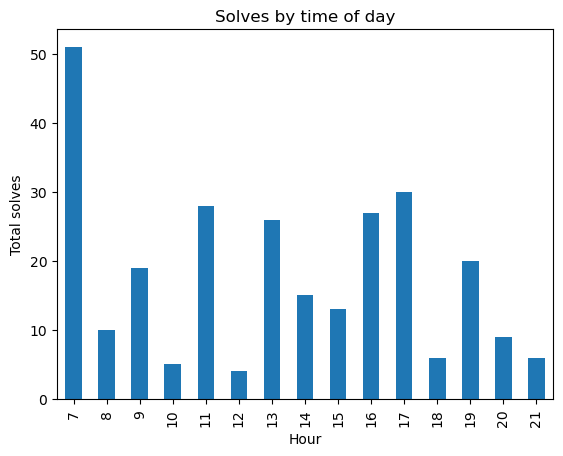

In [58]:
ax = df["Hour"].value_counts().sort_index().plot(kind="bar", xlabel="")
ax.set_xlabel("Hour")
ax.set_ylabel("Total solves")
ax.set_title("Solves by time of day")

Text(0.5, 1.0, 'Solve time by time of day')

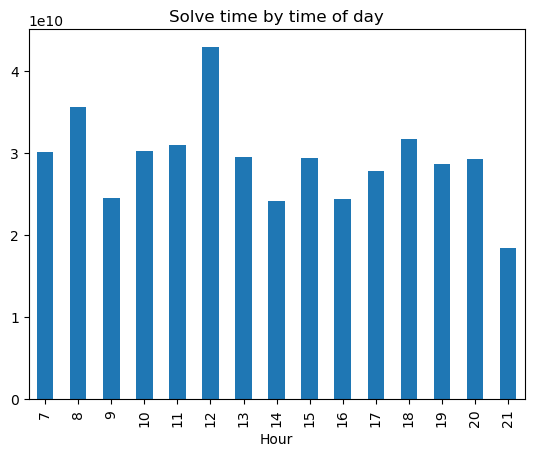

In [59]:
ax = df.groupby("Hour")["Time"].mean().plot(kind="bar")
ax.set_title("Solve time by time of day")